In [1]:
import matplotlib.pyplot as plt
import numpy as np
color = ['r','b','g','black','y']   ## 'grey', 

In [2]:
b = 1
a = 0.05
k = 0.5
t = np.array([i for i in range(100)])
x = np.array([i/100 for i in range(100)])
def b_line(b,x):
    return np.array([b for i in range(len(x))])
def k_line(x,val=0.5):
    return np.array([val for i in range(len(x))])
def find_nearest_element_idx(arr, target):
    nearest = arr[0]
    min_diff = abs(nearest - target)
    
    for element in arr:
        diff = abs(element - target)
        if diff < min_diff:
            min_diff = diff
            nearest = element
    return np.where(arr == nearest)[0][0]

### Lecture 1

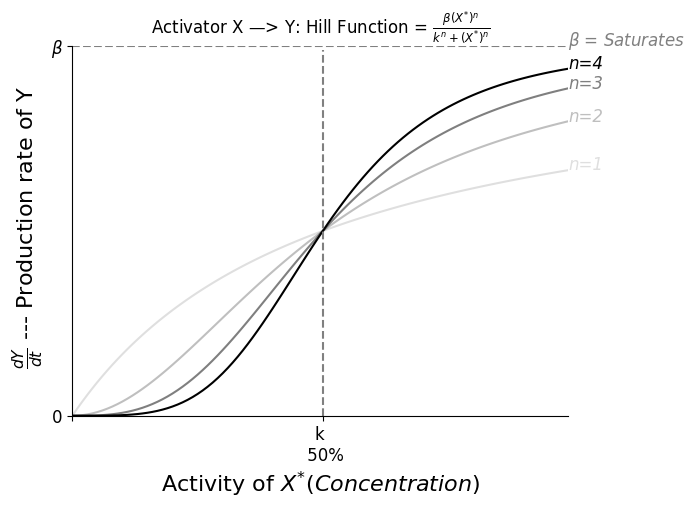

In [3]:
fig,ax = plt.subplots()

for n in [1,2,3,4]:
    y = b * np.power(x,n) / (np.power(k,n) + np.power(x,n))
    ax.plot(x,y,linestyle='-',color='black',alpha= np.power(0.5,4-n))  ## ,label='n={}'.format(n)
    ax.text(x[-1]*1, y[-1], 'n={}'.format(n), style='italic', fontsize=12,color='black',alpha= np.power(0.5,4-n))


# ax.legend(ncol=1,prop={"family": "Times New Roman", "size": 10})
ax.set_ylabel(r' $\frac{dY}{dt}$ --- Production rate of Y', rotation=90, fontdict={'size': 16})
ax.set_xlabel(r'Activity of $X^{*} (Concentration)$', rotation=0, fontdict={'size': 16})
ax.set_title(r"Activator X —> Y: Hill Function = $\frac{\beta(X^{*})^{n}}{k^n + (X^{*})^{n}}$")

ax.plot(x,b_line(b,x),color='grey',linestyle='--')
ax.text(x[-1]*1, b, r'$\beta$ = Saturates', style='italic', fontsize=12,color='grey')
ax.plot(k_line(x),x,color='grey',linestyle='--')
ax.set_xticks(ticks = [0,0.5,1], labels = ['','k \n 50%','100%'], fontsize=12)
ax.set_yticks(ticks = [0,1], labels = [0,r'$\beta$'], fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(bottom=True,top=False,left=True,right=False)
ax.margins(0, 0)
# fig.savefig('1-1.png', bbox_inches='tight')

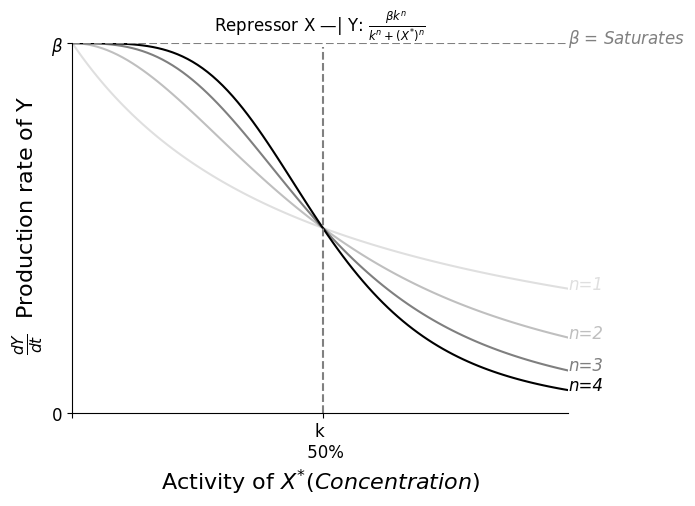

In [4]:
fig,ax = plt.subplots()

for n in [1,2,3,4]:
    y = b * np.power(k,n) / (np.power(k,n) + np.power(x,n))
    ax.plot(x,y,linestyle='-',color='black',alpha= np.power(0.5,4-n)) 
    ax.text(x[-1]*1, y[-1], 'n={}'.format(n), style='italic', fontsize=12,color='black',alpha= np.power(0.5,4-n))


ax.set_ylabel(r' $\frac{dY}{dt}$  Production rate of Y', rotation=90, fontdict={'size': 16})
ax.set_xlabel(r'Activity of $X^{*} (Concentration)$', rotation=0, fontdict={'size': 16})
ax.set_title(r"Repressor X —| Y: $\frac{\beta k^n}{k^n + (X^{*})^{n}}$")

ax.plot(x,b_line(b,x),color='grey',linestyle='--')
ax.text(x[-1]*1, b, r'$\beta$ = Saturates', style='italic', fontsize=12,color='grey')
ax.plot(k_line(x),x,color='grey',linestyle='--')
ax.set_xticks(ticks = [0,0.5,1], labels = ['','k \n 50%','100%'], fontsize=12)
ax.set_yticks(ticks = [0,1], labels = [0,r'$\beta$'], fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(bottom=True,top=False,left=True,right=False)
ax.margins(0, 0)
# fig.savefig('1-2.png', bbox_inches='tight')

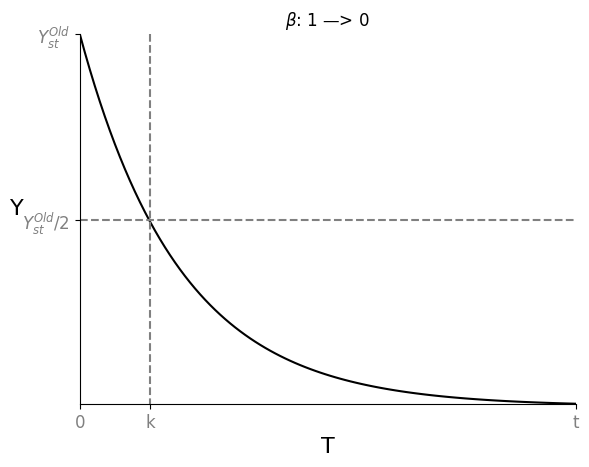

In [5]:
fig,ax = plt.subplots()
ax.set_title(r"$\beta$: 1 —> 0")
ax.set_xlabel(r'T', rotation=0, fontdict={'size': 16})
ax.set_ylabel(r'Y', rotation=0, fontdict={'size': 16})

y_old_balance = 1
y_new_balance = y_old_balance * np.exp(-1 * a * t)
ax.plot(t,y_new_balance,linestyle='-',color='black',alpha= 1) 


ax.plot(t,b_line(y_old_balance/2,t),color='grey',linestyle='--')
midvalT = find_nearest_element_idx(y_new_balance, y_old_balance/2)
ax.plot(k_line(t,val=midvalT),y_new_balance,color='grey',linestyle='--')


ax.set_xticks(ticks = [0,midvalT,t[-1]], labels = ['0','k','t'],color='grey', fontsize=12)
ax.set_yticks(ticks = [0,0.5*y_old_balance,y_old_balance], labels = [' ','$Y_{st}^{Old}/2$',r'$Y_{st}^{Old}$'],color='grey', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(bottom=True,top=False,left=True,right=False)
ax.margins(0, 0)
# fig.savefig('1-3.png', bbox_inches='tight')

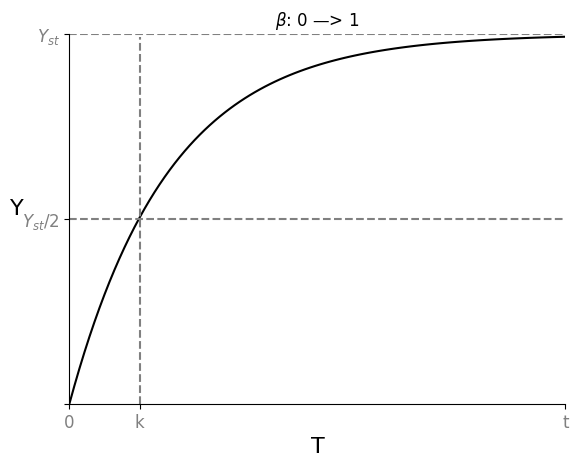

In [6]:
fig,ax = plt.subplots()
ax.set_title(r"$\beta$: 0 —> 1")
ax.set_xlabel(r'T', rotation=0, fontdict={'size': 16})
ax.set_ylabel(r'Y', rotation=0, fontdict={'size': 16})

y_st = 1
y_new_balance = y_st * (1 - np.exp(-1 * a * t))
ax.plot(t,y_new_balance,linestyle='-',color='black',alpha= 1) 

ax.plot(t,b_line(y_st,t),color='grey',linestyle='--')
ax.plot(t,b_line(y_st/2,t),color='grey',linestyle='--')
midvalT = find_nearest_element_idx(y_new_balance, y_st/2)
ax.plot(k_line(t,val=midvalT),y_new_balance,color='grey',linestyle='--')


ax.set_xticks(ticks = [0,midvalT,t[-1]], labels = ['0','k','t'],color='grey', fontsize=12)
ax.set_yticks(ticks = [0,0.5*y_st,y_st], labels = [' ','$Y_{st}/2$',r'$Y_{st}$'],color='grey', fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(bottom=True,top=False,left=True,right=False)
ax.margins(0, 0)
# fig.savefig('1-4.png', bbox_inches='tight')